<a href="https://colab.research.google.com/github/RafsanJany-44/Research_5_Sleep_Stages_Classification/blob/main/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

Your runtime has 27.3 gigabytes of available RAM



In [3]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)
  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from joblib import Parallel, delayed
from google.colab import files
import joblib
  

def save_model(model,model_name):
 joblib.dump(model, model_name)
  
def load_model(model_name):
  return joblib.load(model_name)

In [5]:
import numpy as np
import pandas as pd
from tqdm import tqdm

dataset=pd.read_csv("https://raw.githubusercontent.com/RafsanJany-44/Research_5_Sleep_Stages_Classification/main/DATA/EEG_Five_Stages_HMC.csv")


target="Sleep_Stage"

classes = np.array(sorted(list(set(dataset[target]))))

In [6]:
dataset.head()

,Sleep_Stage,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
0,W,0.00051,8.74146,18.48195,17.48293,8.24195,0.00071,19.73073,29.84585,33.84195,...,0.00724,0.74927,3.87122,1.99805,0.87415,0.000210,35.21561,42.20878,49.95122,49.95122
1,W,0.00040,10.24000,17.48293,16.85854,10.61463,0.00051,17.23317,26.34927,29.34634,...,0.00723,0.49951,3.74634,1.24878,0.49951,0.000095,34.34146,43.33268,49.95122,49.95122
2,W,0.00036,9.74049,17.98244,17.48293,8.74146,0.00047,17.60780,25.47512,28.22244,...,0.00230,0.62439,5.24488,2.12293,0.62439,0.000074,34.59122,45.95512,49.95122,49.95122
3,W,0.00035,10.11512,17.60780,17.10829,9.61561,0.00047,17.35805,26.47415,28.72195,...,0.00091,0.87415,6.61854,3.12195,0.62439,0.000082,32.46829,43.95707,49.95122,49.95122
4,W,0.00033,9.74049,17.60780,17.23317,8.11707,0.00043,17.23317,25.84976,28.09756,...,0.00175,0.49951,5.74439,2.24780,0.49951,0.000077,33.59220,44.83122,49.95122,49.95122


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108451 entries, 0 to 108450
Data columns (total 76 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Sleep_Stage             108451 non-null  object 
 1   MeanP_Alpha_F4          108451 non-null  float64
 2   MedianF_Alpha_F4        108451 non-null  float64
 3   MeanF_Alpha_F4          108451 non-null  float64
 4   Spectral Edge_Alpha_F4  108451 non-null  float64
 5   PeakF_Alpha_F4          108451 non-null  float64
 6   MeanP_Beta_F4           108451 non-null  float64
 7   MedianF_Beta_F4         108451 non-null  float64
 8   MeanF_Beta_F4           108451 non-null  float64
 9   Spectral Edge_Beta_F4   108451 non-null  float64
 10  PeakF_Beta_F4           108451 non-null  float64
 11  MeanP_Theta_F4          108451 non-null  float64
 12  MedianF_Theta_F4        108451 non-null  float64
 13  MeanF_Theta_F4          108451 non-null  float64
 14  Spectral Edge_Theta_

In [8]:
set(list(dataset[target]))

{'N1', 'N2', 'N3', 'R', 'W'}

In [9]:
frequency = dataset["Sleep_Stage"].value_counts()
print(frequency)

N2    39428
N3    21290
W     19355
R     16465
N1    11913
Name: Sleep_Stage, dtype: int64


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])

In [11]:
set(list(dataset[target])) # alphabet wise

{0, 1, 2, 3, 4}

In [12]:
frequency = dataset["Sleep_Stage"].value_counts()
print(frequency)

1    39428
2    21290
4    19355
3    16465
0    11913
Name: Sleep_Stage, dtype: int64


In [13]:
X = dataset.loc[:, dataset.columns!=target]
y = dataset[target]

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [15]:
frequency = y_train.value_counts()
print(frequency)

1    31537
2    17036
4    15551
3    13091
0     9545
Name: Sleep_Stage, dtype: int64


In [16]:
new_dataset=balance(X_train,y_train)

X_train = new_dataset.loc[:, new_dataset.columns!=target]
y_train = new_dataset[target]

In [17]:
frequency = y_train.value_counts()
print(frequency)

0    31537
3    31537
2    31537
1    31537
4    31537
Name: Sleep_Stage, dtype: int64


#Confusion Properties

In [18]:
def confusion_details(y_test,y_pred):
    labels = list(set(y_test))
    labels.sort()

    print("Total labels: %s -> %s" % (len(labels), labels))

    df = pd.DataFrame(
        data=confusion_matrix(y_test, y_pred, labels=labels),
        columns=labels,
        index=labels
    )

    print(df)

    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()
    #
    # Local (metrics per class)
    #
    tps = {}
    fps = {}
    fns = {}
    tns = {}

    precision_local = {}
    recall_local = {}
    f1_local = {}
    accuracy_local = {}
    specificity_local={}

    for label in labels:
        tps[label] = df.loc[label, label]
        fps[label] = df[label].sum() - tps[label]
        fns[label] = df.loc[label].sum() - tps[label]
        tns[label]=len(y_test) - (tps[label] + fps[label] + fns[label])
        
        tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]
        
        precision_local[label] = tp / (tp + fp) if (tp + fp) > 0. else 0.
        specificity_local[label] = tn / (tn + fp) if (tn + fp) > 0. else 0.
        recall_local[label] = tp / (tp + fn) if (tp + fp) > 0. else 0.
        p, r = precision_local[label], recall_local[label]
        
        f1_local[label] = 2. * p * r / (p + r) if (p + r) > 0. else 0.
        accuracy_local[label] = tp / (tp + fp + fn) if (tp + fp + fn) > 0. else 0.



    print("#-- Local measures --#")
    print("True Positives(TP):", tps)
    print("False Positives(FP):", fps)
    print("True Negatives(TN):", tns)
    print("False Negatives(FN):", fns)
    print("----------------------------")

    print("Precision:", precision_local)
    print("Recall/Sensitivity:", recall_local)
    print("Specificity:",specificity_local)
    print("F1-Score:", f1_local)
    print("Accuracy:", accuracy_local)


    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()
    #
    # Global
    #
    micro_averages = {}
    macro_averages = {}

    correct_predictions = sum(tps.values())
    true_negative=sum(tns.values())

    den = sum(list(tps.values()) + list(fps.values()))
    micro_averages["Precision"] = 1. * correct_predictions / den if den > 0. else 0.

    den = sum(list(tps.values()) + list(fns.values()))
    micro_averages["Recall"] = 1. * correct_predictions / den if den > 0. else 0.

    den = sum(list(tns.values()) + list(fps.values()))
    micro_averages["Specificity"] = 1. * true_negative / den if den > 0. else 0.


    micro_avg_p, micro_avg_r = micro_averages["Precision"], micro_averages["Recall"]
    micro_averages["F1-score"] = 2. * micro_avg_p * micro_avg_r / (micro_avg_p + micro_avg_r) if (micro_avg_p + micro_avg_r) > 0. else 0.

    macro_averages["Precision"] = np.mean(list(precision_local.values()))
    macro_averages["Recall"] = np.mean(list(recall_local.values()))
    macro_averages["Specificity"]=np.mean(list(specificity_local.values()))


    macro_avg_p, macro_avg_r = macro_averages["Precision"], macro_averages["Recall"]
    macro_averages["F1-Score"] = 2. * macro_avg_p * macro_avg_r / (macro_avg_p + macro_avg_r) if (macro_avg_p + macro_avg_r) > 0. else 0.

    total_predictions = df.values.sum()
    accuracy_global = correct_predictions / total_predictions if total_predictions > 0. else 0.

    print("#-- Global measures --#")
    print("Micro-Averages:", micro_averages)
    print("Macro-Averages:", macro_averages)
    print("Correct predictions:", correct_predictions)
    print("Total predictions:", total_predictions)
    print("Accuracy:", accuracy_global)


    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()



    accuracy_local_new = {}
    for label in labels:
        tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]
        accuracy_local_new[label] = (tp + tn) / (tp + fp + fn + tn) if (tp + fp + fn + tn) > 0. else 0.

    total_true = sum(list(tps.values()) + list(tns.values()))
    total_predictions = sum(list(tps.values()) + list(tns.values()) + list(fps.values()) + list(fns.values()))
    accuracy_global_new = 1. * total_true / total_predictions if total_predictions > 0. else 0.

    print("Accuracy (per class), with TNs:", accuracy_local_new)
    print("Accuracy (per class), without TNs:", accuracy_local)
    print("Accuracy (global), with TNs:", accuracy_global_new)
    print("Accuracy (global), without TNs:", accuracy_global)

In [19]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def Con_Mat(y_test,y_pred):
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize = (15,10))
  sn.heatmap(cm, annot=True, fmt='d',linewidth=.5) # here, cm is called to be visualized
  plt.xlabel('Predicted',fontsize=14.0, fontweight='bold')
  plt.ylabel('Truth',fontsize=12.0, fontweight='bold')

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def Accurecy_Details(y_test,y_pred):    
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test,y_pred))
  print("Accurecy: ",accuracy_score(y_test, y_pred))

#Random Forest

In [21]:
#rf = load_model("/content/drive/MyDrive/Machine Learning Models/5 Stage Sleep Classification/12Nov2022/RandomForestClassifier(max_depth=49, n_estimators=5000, random_state=0)")



#XGBoost

In [22]:
#xg = load_model("/content/drive/MyDrive/Machine Learning Models/5 Stage Sleep Classification/12Nov2022/XGBClassifier(n_estimators=8000,max_depth=14,random_state=0)")




#GradientBoosting

In [26]:
gb = load_model("/content/drive/MyDrive/Machine Learning Models/5 Stage Sleep Classification/12Nov2022/GradientBoostingClassifier(max_depth=14, n_estimators=4500)")


In [27]:

y_pred=gb.predict(X_test)
Accurecy_Details(y_test, y_pred)

[[1108  526    7  258  469]
 [ 401 6654  428  244  164]
 [  63  615 3549    6   21]
 [ 183  229    9 2884   69]
 [ 283   71    6   22 3422]]
              precision    recall  f1-score   support

           0       0.54      0.47      0.50      2368
           1       0.82      0.84      0.83      7891
           2       0.89      0.83      0.86      4254
           3       0.84      0.85      0.85      3374
           4       0.83      0.90      0.86      3804

    accuracy                           0.81     21691
   macro avg       0.78      0.78      0.78     21691
weighted avg       0.81      0.81      0.81     21691

Accurecy:  0.8121801668894933


In [28]:
confusion_details(y_test, y_pred)

Total labels: 5 -> [0, 1, 2, 3, 4]
      0     1     2     3     4
0  1108   526     7   258   469
1   401  6654   428   244   164
2    63   615  3549     6    21
3   183   229     9  2884    69
4   283    71     6    22  3422

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

#-- Local measures --#
True Positives(TP): {0: 1108, 1: 6654, 2: 3549, 3: 2884, 4: 3422}
False Positives(FP): {0: 930, 1: 1441, 2: 450, 3: 530, 4: 723}
True Negatives(TN): {0: 18393, 1: 12359, 2: 16987, 3: 17787, 4: 17164}
False Negatives(FN): {0: 1260, 1: 1237, 2: 705, 3: 490, 4: 382}
----------------------------
Precision: {0: 0.5436702649656526, 1: 0.8219888820259419, 2: 0.8874718679669917, 3: 0.8447568834212068, 4: 0.8255729794933655}
Recall/Sensitivity: {0: 0.46790540540540543, 1: 0.8432391331897098, 2: 0.8342736248236954, 3: 0.8547717842323651, 4: 0.8995793901156677}
Specificity: 

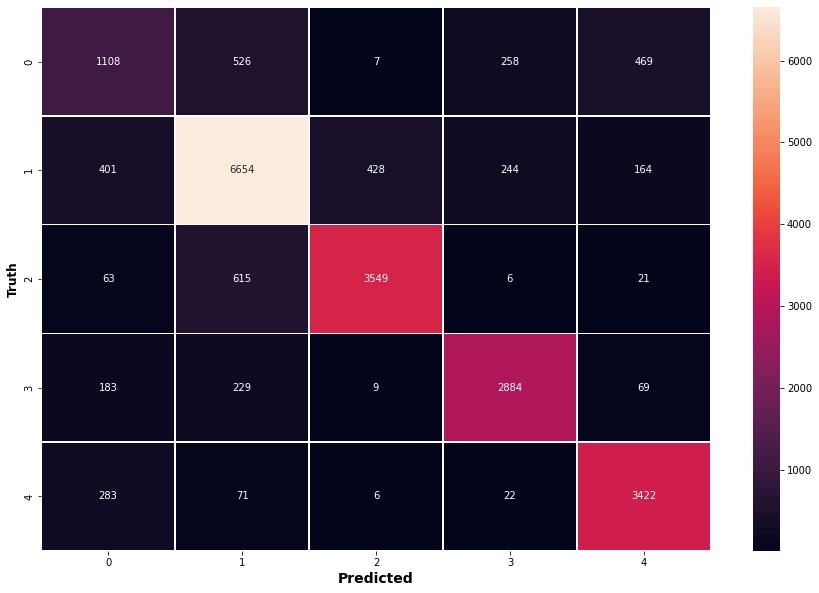

In [29]:
Con_Mat(y_test,y_pred)